# Yahoo Finance 下載台積電股價資料


In [293]:
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 台積電股價資料

In [294]:
TSMC = yf.Ticker("2330.TW")
TSMC.info


{'address1': 'Hsinchu Science Park',
 'address2': 'No. 8, Li-Hsin Road 6',
 'city': 'Hsinchu City',
 'zip': '300096',
 'country': 'Taiwan',
 'phone': '886 3 563 6688',
 'fax': '886 3 563 7000',
 'website': 'https://www.tsmc.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Taiwan Semiconductor Manufacturing Company Limited, together with its subsidiaries, manufactures, packages, tests, and sells integrated circuits and other semiconductor devices in Taiwan, China, Europe, the Middle East, Africa, Japan, the United States, and internationally. It provides a range of wafer fabrication processes, including processes to manufacture complementary metal- oxide-semiconductor (CMOS) logic, mixed-signal, radio frequency, embedded memory, bipolar CMOS mixed-signal, and others. The company also offers customer and engineering support se

In [295]:
tsmc = yf.download('2330.TW',start='2016-01-01',end='2021-01-01')
tsmc

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,,
2016-01-04,107.623650,139.5,143.5,139.0,142.5,39169000
2016-01-05,106.466377,138.0,140.0,137.0,139.0,46381000
2016-01-06,104.537651,135.5,138.0,135.0,138.0,53617000
2016-01-07,102.608902,133.0,135.0,130.5,134.5,62539000
2016-01-08,103.380409,134.0,135.0,132.0,132.0,50123000
...,...,...,...,...,...,...
2020-12-25,473.202057,511.0,515.0,510.0,514.0,12327895
2020-12-28,476.906219,515.0,515.0,509.0,512.0,19087382


In [296]:
tsmc = yf.download('2330.TW',period='5y', interval='1d')
avg_values = (tsmc['High'] + tsmc['Low']) / 2
avg_values.to_csv('tsmc_avg_prices.csv')
avg_values


[*********************100%***********************]  1 of 1 completed


Ticker,2330.TW
Date,
2019-12-13,340.50
2019-12-16,337.25
2019-12-17,340.00
2019-12-18,343.25
2019-12-19,338.50
...,...
2024-12-09,1070.00
2024-12-10,1067.50
2024-12-11,1052.50


In [297]:
avg_values = pd.read_csv('tsmc_avg_prices.csv')
avg_values



,Date,2330.TW
0,2019-12-13,340.50
1,2019-12-16,337.25
2,2019-12-17,340.00
3,2019-12-18,343.25
4,2019-12-19,338.50
...,...,...
1211,2024-12-09,1070.00
1212,2024-12-10,1067.50
1213,2024-12-11,1052.50
1214,2024-12-12,1060.00


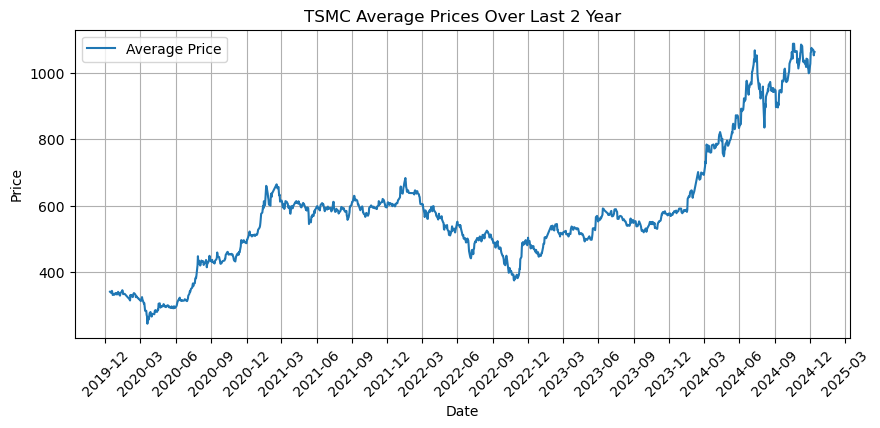

In [298]:
# 繪製折線圖
plt.figure(figsize=(10, 4))
# 將Datetime轉換為datetime格式以便更好地處理時間軸
avg_values['Date'] = pd.to_datetime(avg_values['Date'])
# 設定x軸的刻度為每3個月一個標籤
plt.plot(avg_values['Date'], avg_values['2330.TW'], label='Average Price')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.title('TSMC Average Prices Over Last 2 Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [299]:
#SEQ_LEN = 60
#FUTURE_PERIOD_PREDICT = 1 #day, how far into the future are we trying to predict?
#RATIO_TO_PREDICT = "avg"
# 設定參數
SEQ_LEN = 5  # 序列長度
FUTURE_PERIOD_PREDICT = 1  # 預測未來天數
RATIO_TO_PREDICT = "2330.TW"  # 要預測的欄位

In [300]:
def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

In [301]:
avg_values['future'] = avg_values[RATIO_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
avg_values['target'] = list(map(classify, avg_values[RATIO_TO_PREDICT], avg_values['future']))
avg_values

,Date,2330.TW,future,target
0,2019-12-13,340.50,337.25,0
1,2019-12-16,337.25,340.00,1
2,2019-12-17,340.00,343.25,1
3,2019-12-18,343.25,338.50,0
4,2019-12-19,338.50,330.75,0
...,...,...,...,...
1211,2024-12-09,1070.00,1067.50,0
1212,2024-12-10,1067.50,1052.50,0
1213,2024-12-11,1052.50,1060.00,1
1214,2024-12-12,1060.00,1062.50,1


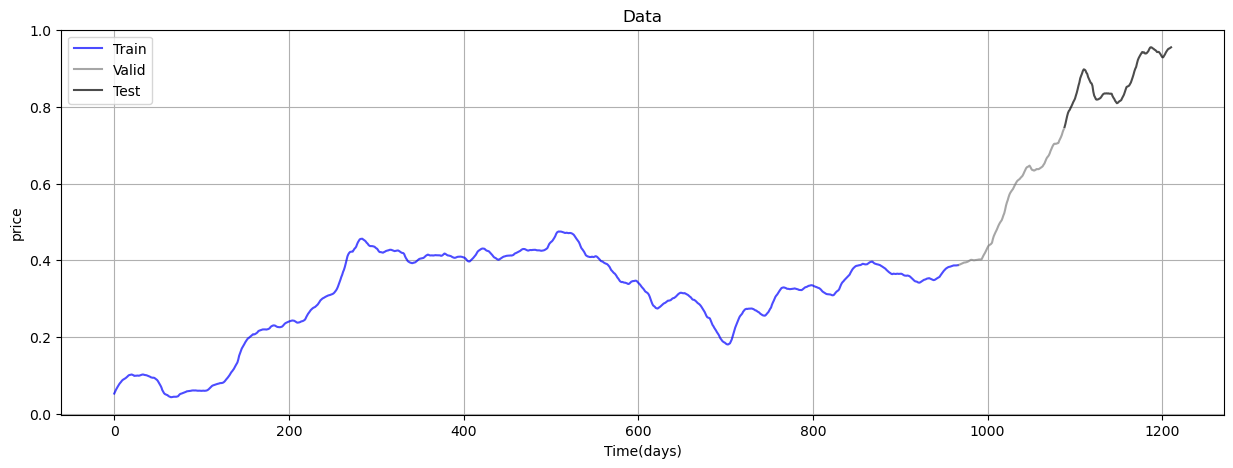

總數據量: 1216
訓練集大小: 967
驗證集大小: 121
測試集大小: 123


In [302]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
SEQ_LEN = 5
FUTURE_PERIOD_PREDICT = 1
RATIO_TO_PREDICT = "2330.TW"

# 獲取所有數據並進行預處理
all_data = avg_values[RATIO_TO_PREDICT].values.reshape(-1, 1)

# 使用MinMaxScaler進行整體歸一化
scaler = MinMaxScaler()
all_data_scaled = scaler.fit_transform(all_data)

# 應用EMA平滑處理到整個數據集
def apply_ema(data, gamma=0.1):
    ema = 0.0
    smoothed_data = np.zeros_like(data)
    for i in range(len(data)):
        ema = gamma * data[i] + (1 - gamma) * ema
        smoothed_data[i] = ema
    return smoothed_data

all_data_smoothed = apply_ema(all_data_scaled)

# 計算分割點
total_len = len(all_data_smoothed)
train_len = int(0.8 * total_len)
valid_len = int(0.1 * total_len)
test_len = total_len - train_len - valid_len

# 創建序列數據的函數
def create_sequences(data, seq_length, future_period):
    X, y = [], []
    for i in range(len(data) - seq_length - future_period + 1):
        X.append(data[i:(i + seq_length)]) #0-4
        y.append(data[i + seq_length + future_period - 1]) #5   
    return np.array(X), np.array(y)

# 創建完整的序列數據
X_all, y_all = create_sequences(all_data_smoothed, SEQ_LEN, FUTURE_PERIOD_PREDICT)

# 分割序列數據
train_end = train_len - SEQ_LEN
val_end = train_len + valid_len - SEQ_LEN

X_train = X_all[:train_end]
y_train = y_all[:train_end]

X_valid = X_all[train_end:val_end]
y_valid = y_all[train_end:val_end]

X_test = X_all[val_end:]
y_test = y_all[val_end:]

# 重塑數據
if len(X_train) > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
if len(X_valid) > 0:
    X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
if len(X_test) > 0:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 畫出預測圖表
plt.figure(figsize=(15, 5))

# 繪製訓練數據
if len(y_train) > 0:
    plt.plot(range(len(y_train)), y_train, 
             color='blue', label='Train', alpha=0.7)

# 繪製驗證數據
if len(y_valid) > 0:
    plt.plot(range(len(y_train), len(y_train) + len(y_valid)), 
             y_valid, color='gray', label='Valid', alpha=0.7)

# 繪製測試數據
if len(y_test) > 0:
    plt.plot(range(len(y_train) + len(y_valid), 
                   len(y_train) + len(y_valid) + len(y_test)),
             y_test, color='black', label='Test', alpha=0.7)

plt.title('Data')
plt.xlabel('Time(days)')
plt.ylabel('price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 打印數據集大小
print(f"總數據量: {len(all_data_smoothed)}")
print(f"訓練集大小: {len(y_train)}")
print(f"驗證集大小: {len(y_valid)}")
print(f"測試集大小: {len(y_test)}")

In [303]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)



(967, 5, 1)
(121, 5, 1)
(123, 5, 1)


In [304]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 將 numpy 數據轉換為 torch Tensor 並移動到設備
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_valid = torch.tensor(X_valid, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1).to(device)
y_valid = torch.tensor(y_valid, dtype=torch.float32).unsqueeze(-1).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1).to(device)

In [305]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)


torch.Size([967, 5, 1])
torch.Size([121, 5, 1])
torch.Size([123, 5, 1])
torch.Size([967, 1, 1])
torch.Size([121, 1, 1])
torch.Size([123, 1, 1])


In [306]:
import torch
import torch.nn as nn
import math

# Positional Encoding 定義
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        seq_len = x.size(1)
        return x + self.encoding[:, :seq_len, :].to(x.device)
    
# 修改的部分
feature_size = 64  # 讓嵌入層大小變為能被 nhead 整除
nhead = 8         # 多頭注意力的頭數
num_layers = 2     # 編碼器層數
dropout = 0.1

# TransAm 模型定義
class TransAm(nn.Module):
    def __init__(self, feature_size=feature_size, num_layers=1, dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)  # 確保位置編碼使用正確的 feature_size
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = torch.triu(torch.ones(sz, sz) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransAm(feature_size=feature_size, num_layers=num_layers, dropout=dropout).to(device)

# 損失函數和優化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

# Early Stopping 參數
patience = 10  # 容忍多少個epoch驗證損失沒有改善
min_delta = 0.001  # 最小改善閾值
patience_counter = 0
best_valid_loss = float('inf')
best_model_state = None

# 訓練過程
num_epochs = 200
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    # 訓練模式
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    train_loss = criterion(output, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # 驗證模式
    model.eval()
    with torch.no_grad():
        valid_output = model(X_valid)
        valid_loss = criterion(valid_output, y_valid)
        valid_losses.append(valid_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}")

    # Early Stopping 檢查
    if valid_loss < best_valid_loss - min_delta:
        best_valid_loss = valid_loss
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f'Early stopping triggered at epoch {epoch+1}')
        # 恢復最佳模型
        model.load_state_dict(best_model_state)
        break

# 測試集評估
model.eval()
with torch.no_grad():
    test_output = model(X_test)
    test_loss = criterion(test_output, y_test)
print(f"Test Loss: {test_loss.item():.4f}")


c:\Users\eddyw\anaconda3\envs\dl\lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
c:\Users\eddyw\anaconda3\envs\dl\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([967, 1, 1])) that is different to the input size (torch.Size([967, 5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\eddyw\anaconda3\envs\dl\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([121, 1, 1])) that is different to the input size (torch.Size([121, 5, 1])). This will likely lead to incorrec

Epoch 1/200, Train Loss: 0.0729, Valid Loss: 0.1258
Epoch 2/200, Train Loss: 0.0597, Valid Loss: 0.1026
Epoch 3/200, Train Loss: 0.0489, Valid Loss: 0.0823
Epoch 4/200, Train Loss: 0.0393, Valid Loss: 0.0652
Epoch 5/200, Train Loss: 0.0323, Valid Loss: 0.0511
Epoch 6/200, Train Loss: 0.0277, Valid Loss: 0.0399
Epoch 7/200, Train Loss: 0.0253, Valid Loss: 0.0314
Epoch 8/200, Train Loss: 0.0256, Valid Loss: 0.0253
Epoch 9/200, Train Loss: 0.0265, Valid Loss: 0.0211
Epoch 10/200, Train Loss: 0.0274, Valid Loss: 0.0184
Epoch 11/200, Train Loss: 0.0292, Valid Loss: 0.0167
Epoch 12/200, Train Loss: 0.0297, Valid Loss: 0.0158
Epoch 13/200, Train Loss: 0.0301, Valid Loss: 0.0154
Epoch 14/200, Train Loss: 0.0293, Valid Loss: 0.0156
Epoch 15/200, Train Loss: 0.0287, Valid Loss: 0.0162
Epoch 16/200, Train Loss: 0.0289, Valid Loss: 0.0173
Epoch 17/200, Train Loss: 0.0268, Valid Loss: 0.0188
Epoch 18/200, Train Loss: 0.0259, Valid Loss: 0.0208
Epoch 19/200, Train Loss: 0.0246, Valid Loss: 0.0232
Ep

c:\Users\eddyw\anaconda3\envs\dl\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([123, 1, 1])) that is different to the input size (torch.Size([123, 5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


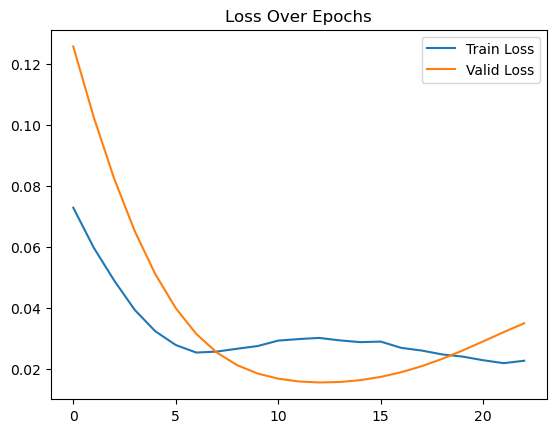

In [307]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


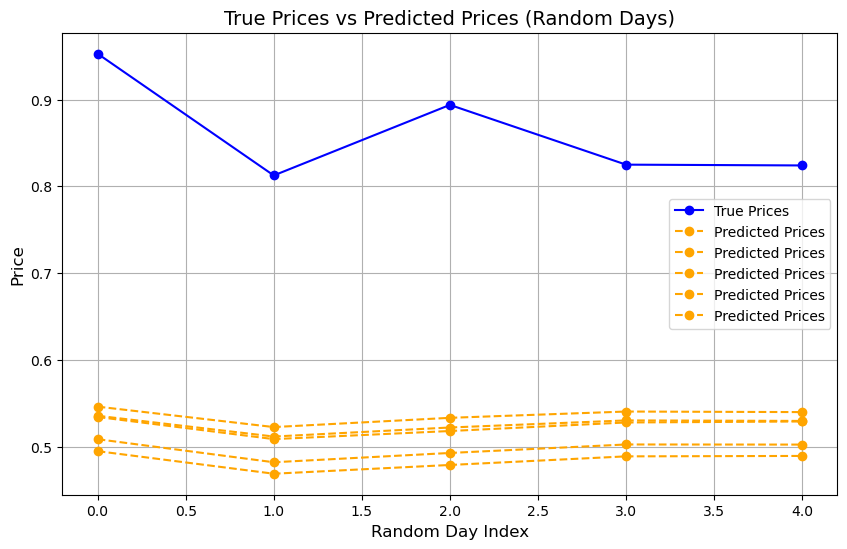

In [311]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

# 模型已經訓練完成，進行測試集預測
model.eval()
with torch.no_grad():
    predicted_prices = model(X_test).cpu().numpy().squeeze()
    true_prices = y_test.cpu().numpy().squeeze()

# 隨機選取幾天進行比較
random_days = random.sample(range(len(true_prices)), 5)
selected_true_prices = true_prices[random_days]
selected_predicted_prices = predicted_prices[random_days]

# 繪製可視化圖表
plt.figure(figsize=(10, 6))
plt.plot(range(len(selected_true_prices)), selected_true_prices, label='True Prices', marker='o', linestyle='-', color='blue')
plt.plot(range(len(selected_predicted_prices)), selected_predicted_prices, label='Predicted Prices', marker='o', linestyle='--', color='orange')
plt.title('True Prices vs Predicted Prices (Random Days)', fontsize=14)
plt.xlabel('Random Day Index', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()